<h1> Data Analysis - Credit Risk <h1>

In [1]:
# to handle datasets
import pandas as pd
import numpy as np
import os

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset

os.chdir("/Users/caiobaptista/Desktop/DOC/Machine Learning/Kaggle/SBA")

data = pd.read_csv("SBAnational.csv")

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(899164, 27)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


- Variáveis:
1. LoanNr_ChkDgt: Identificador (key)
2. Name: Nome do Banco
3. City: Cidade
4. State: Estado
5. ZIP : CEP
6. Bank: Banco
7. Bank State: Estado do Banco
8. NAICS: North American Industry Classification System
9. ApprovalDate: Data de aprovaçao do empréstimo
10. ApprovalFY: Ano fiscal do compromisso
11. Term: Prazo em meses
12. NoEmp: Numero de empregados
13. NewExist: 1 - Negócio existente, 2 - Novo Negócio
14. CreateJob: Empregos criados
15. RetainedJob: Empregos retidos
16. FranchiseCode: 
17. UrbanRural: 1 - Urban, 2 - Rural, 0 - Undefined
18. Revline: linha de credito rotativo
19. LowDoc: Programa de empréstimos menos burocráticos, em que empréstimos abaixo de 150.000 podem ser processados com aplicaçao de uma página.
20. ChgOffDate: data da inadimplencia
21. DisbursementDate: Data do desembolso
22. DisbursementGross: Quantidade concedida
23. BalanceGross:
24. MIS_Status: PIF for paied full and Charged off for default
25. GrAppv: Quantidade de empréstimo aprovada pelo banco
26. RevLineCr: Linha de credito rotativo
27. SBA_Appv: quantidade aprovada pela SBA

- Retirando Indices

In [3]:
data.drop(["LoanNr_ChkDgt", "FranchiseCode"], axis = 1, inplace= True)

In [4]:
data.shape

(899164, 25)

In [5]:
data.head()

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


# Exploratory Data Analysis #
We will analyse the following:

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
- Discrete
- Continuous
- Distributions
- Transformations

5. Categorical variables

- Cardinality
- Rare Labels
- Special mappings

6. Additional Reading Resources

In [6]:
import string
a = string.ascii_letters+string.punctuation+string.whitespace
alpha = list(a)
alpha

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 ' ',
 '\t',
 '\n',
 '\r',
 '\x0b',
 '\x0c']

## Target ##

In [7]:
data["MIS_Status"].isnull().mean()

0.0022209519064375354

In [8]:
data["MIS_Status"] = np.where(data["MIS_Status"] == "P I F", 0, 1)

In [9]:
data["MIS_Status"].value_counts()*100/len(data)

0    82.255184
1    17.744816
Name: MIS_Status, dtype: float64

- 17.5% foram inadimplentes

## Variable Types ##

In [10]:
cat_vars = ["Name", "City", "State", "Zip", "Bank", "BankState", "NAICS"]

In [11]:
binary_vars = ["NewExist", "UrbanRural", "RevLineCr", "LowDoc"]

In [12]:
num_vars = ["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]

In [13]:
disc_vars = ["NoEmp", "CreateJob", "RetainedJob"]

In [14]:
temp_vars = ["ApprovalDate", "ApprovalFY",  "DisbursementDate", "ChgOffDate"]

## Categorical ##

In [15]:
print(cat_vars)

['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS']


In [16]:
data[cat_vars].isnull().mean()

Name         0.000016
City         0.000033
State        0.000016
Zip          0.000000
Bank         0.001734
BankState    0.001742
NAICS        0.000000
dtype: float64

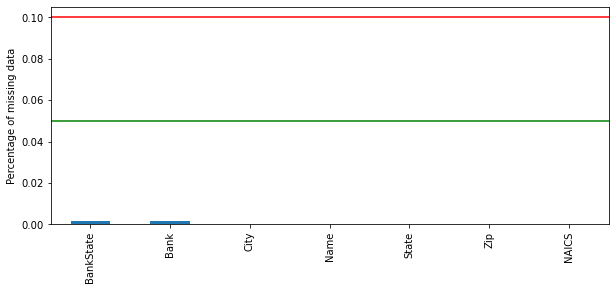

In [17]:
data[cat_vars].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.10, color='r', linestyle='-')
plt.axhline(y=0.05, color='g', linestyle='-')

plt.show()

- Baixa porcentagem de valores nulos nas variáveis categoricas

### Analisando o Default por Estado e por NAICS ###

In [18]:
data["NAICS"] = data["NAICS"].astype(str).apply(lambda x: x[:2])

In [19]:
data["NAICS"].value_counts()

0     201948
44     84737
81     72618
54     68170
72     67600
23     66646
62     55366
42     48743
45     42514
33     38284
56     32685
48     20310
32     17936
71     14640
53     13632
31     11809
51     11379
52      9496
11      9005
61      6425
49      2221
21      1851
22       663
55       257
92       229
Name: NAICS, dtype: int64

In [20]:
data["NAICS_names"] = data["NAICS"].map({
    '0': 'Outros',
    '11': 'Agri/Forest/Fish/Hunt',
    '21': 'Minning',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'Rental/Leasing',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [21]:
data["NAICS_names"].head()

0                Retail_trade
1             Accom/Food_serv
2    Healthcare/Social_assist
3                      Outros
4                      Outros
Name: NAICS_names, dtype: object

In [22]:
data["NAICS_names"].isnull().mean()

0.0

<AxesSubplot:title={'center':'Default Probability'}, xlabel='NAICS_names'>

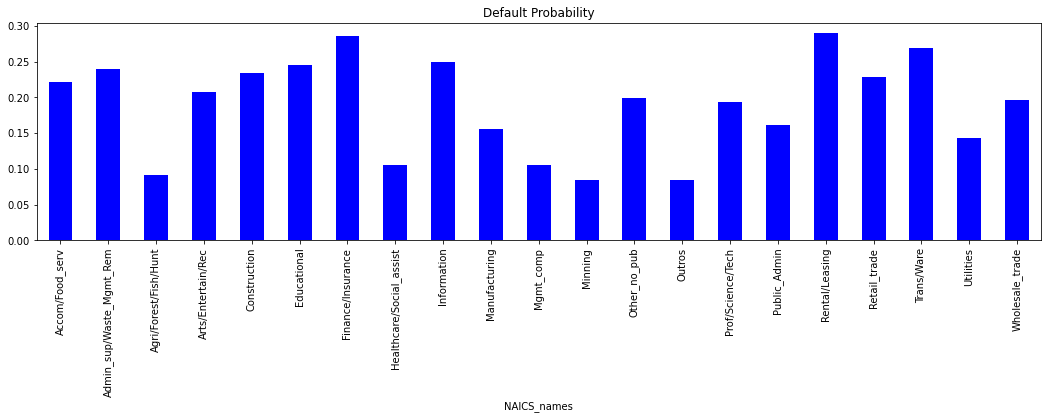

In [23]:
tmp = data.groupby(["NAICS_names"])["MIS_Status"].agg(["mean"])
tmp.plot(kind="bar", y="mean", legend=False, title="Default Probability", color='blue', figsize=(18, 4))

<AxesSubplot:title={'center':'Default Probability'}, xlabel='State'>

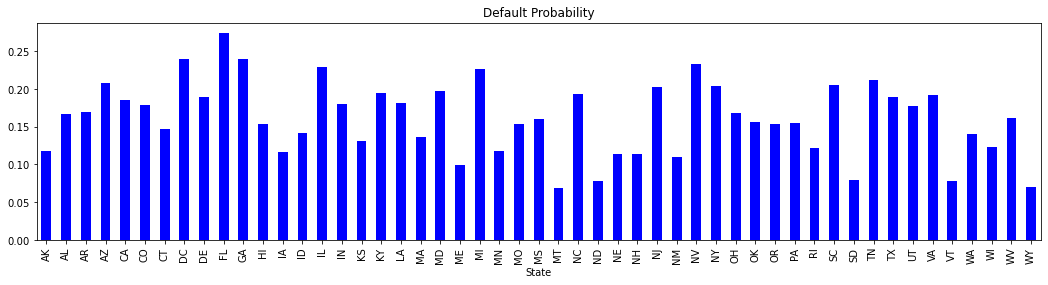

In [24]:
tmp = data.groupby(["State"])["MIS_Status"].agg(["mean"])
tmp.plot(kind="bar", y="mean", legend=False, title="Default Probability", color='blue', figsize=(18, 4))

<ipython-input-25-470851ff2dd0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(default_industry_tab.index, rotation=60, horizontalalignment='right', fontsize=10)
<ipython-input-25-470851ff2dd0>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(default_state_tab.index, rotation=60, horizontalalignment='right', fontsize=10)


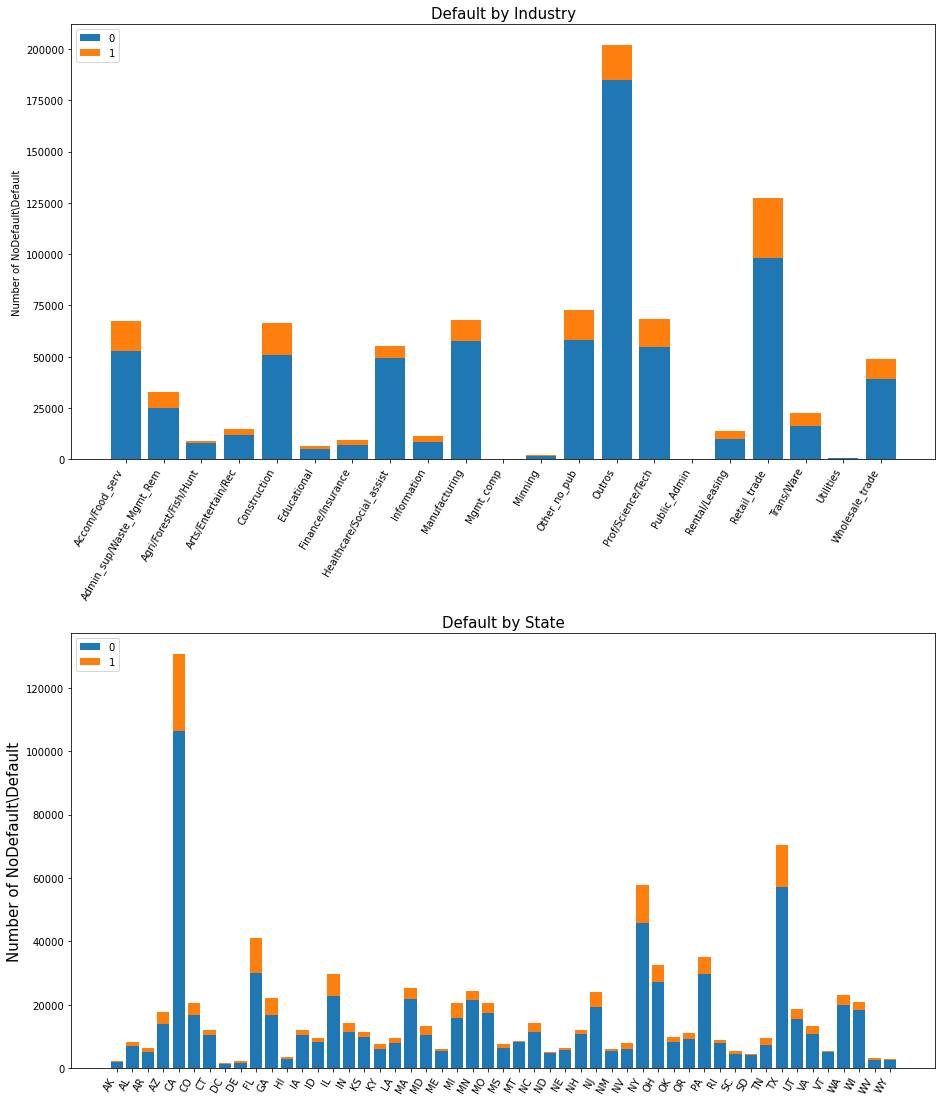

In [25]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize= (15,5))

default_industry_tab = pd.crosstab(data["NAICS_names"], data["MIS_Status"])

ax1.bar(default_industry_tab.index, default_industry_tab[0])
ax1.bar(default_industry_tab.index, default_industry_tab[1], bottom = default_industry_tab[0])
ax1.set_ylabel("Number of NoDefault\Default", fontsize = 10)
ax1.set_title("Default by Industry", fontsize = 15)
ax1.set_xticklabels(default_industry_tab.index, rotation=60, horizontalalignment='right', fontsize=10)
ax1.legend(default_industry_tab, loc = 2, fontsize = 10)

default_state_tab = pd.crosstab(data["State"], data["MIS_Status"])

ax2.bar(default_state_tab.index, default_state_tab[0])
ax2.bar(default_state_tab.index, default_state_tab[1], bottom = default_state_tab[0])
ax2.set_ylabel("Number of NoDefault\Default", fontsize = 15)
ax2.set_title("Default by State", fontsize = 15)
ax2.set_xticklabels(default_state_tab.index, rotation=60, horizontalalignment='right', fontsize=10)
ax2.legend(default_state_tab, loc = 2, fontsize = 10)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=3, 
                    wspace=0.4, 
                    hspace=0.4)

## Binárias ##

In [26]:
for var in data[binary_vars]:
    print(data[var].value_counts())

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64
1    470654
0    323167
2    105343
Name: UrbanRural, dtype: int64
N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
7         1
.         1
A         1
,         1
-         1
3         1
Q         1
4         1
5         1
Name: RevLineCr, dtype: int64
N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64


In [27]:
data[binary_vars].isnull().sum()

NewExist       136
UrbanRural       0
RevLineCr     4528
LowDoc        2582
dtype: int64

In [28]:
data[binary_vars].astype("O")

,NewExist,UrbanRural,RevLineCr,LowDoc
0,2.0,0,N,Y
1,2.0,0,N,Y
2,1.0,0,N,N
3,1.0,0,N,Y
4,1.0,0,N,N
...,...,...,...,...
899159,1.0,0,0,N
899160,1.0,0,Y,N
899161,1.0,0,N,N
899162,1.0,0,N,Y


In [29]:
for var in binary_vars:
    data[var] = np.where(data[var] == 1.0, "1",
                         (np.where(data[var] == 2.0, "2",
                                 (np.where(data[var] == "Y", "Y",
                                         (np.where(data[var] == "N", "N", 
                                                  (np.where(data[var] == 1, "1",
                                                           (np.where(data[var] == 2, "2",
                                                                    (np.where(data[var] == 0, "0", np.nan)))))))))))))

In [30]:
data[binary_vars].head()

,NewExist,UrbanRural,RevLineCr,LowDoc
0,2,0,N,Y
1,2,0,N,Y
2,1,0,N,N
3,1,0,N,Y
4,1,0,N,N


In [31]:
for var in data[binary_vars]:
    print(data[var].value_counts())

1      644869
2      253125
0        1034
nan       136
Name: NewExist, dtype: int64
1    470654
0    323167
2    105343
Name: UrbanRural, dtype: int64
N      420288
nan    277479
Y      201397
Name: RevLineCr, dtype: int64
N      782822
Y      110335
nan      6007
Name: LowDoc, dtype: int64


In [32]:
(data[binary_vars] == "nan").sum()

NewExist         136
UrbanRural         0
RevLineCr     277479
LowDoc          6007
dtype: int64

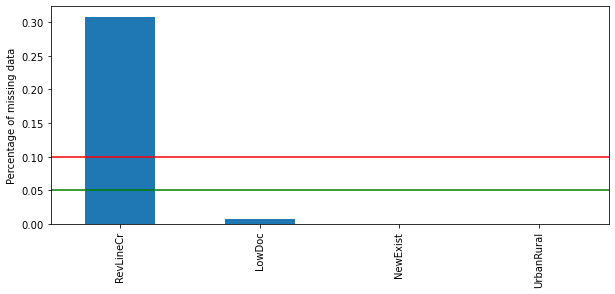

In [33]:
(data[binary_vars] == "nan").mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.10, color='r', linestyle='-')
plt.axhline(y=0.05, color='g', linestyle='-')

plt.show()

In [34]:
def analyse_na_value(df, var):
    df = df.copy()
    df[var] = np.where(df[var] == "nan", 1, 0)
    tmp = df.groupby(var)["MIS_Status"].agg(['mean'])
    tmp.plot(kind="barh", y="mean", legend=False,
             title="Sale Price", color='green')

    plt.show()

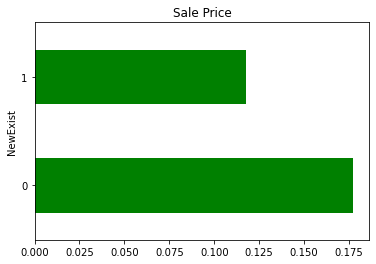

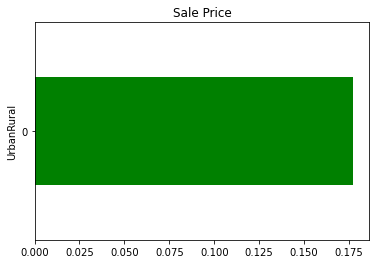

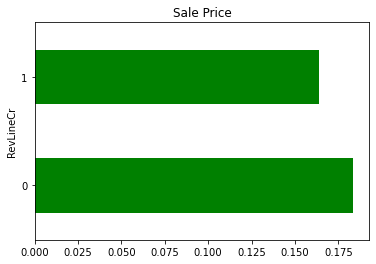

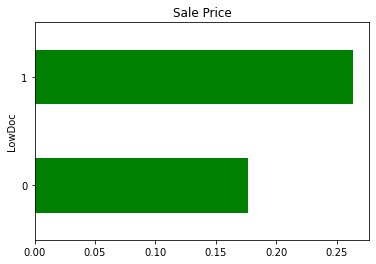

In [35]:
for var in binary_vars:
    analyse_na_value(data, var)

 - Há uma diferença de inadimplencia entre as variáveis com valores e sem valores ou valores errados.

## Numerical Variables ##

In [36]:
print(num_vars)

['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']


In [37]:
data[num_vars].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [38]:
print(data[num_vars].dtypes)

DisbursementGross    object
BalanceGross         object
ChgOffPrinGr         object
GrAppv               object
SBA_Appv             object
dtype: object


In [39]:
for var in num_vars:
    data[var] = data[var].astype(str).str.replace("$", "").str.replace(",", "").astype(float)

<ipython-input-39-598b6671a24c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data[var] = data[var].astype(str).str.replace("$", "").str.replace(",", "").astype(float)


In [40]:
data[num_vars].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [41]:
data[num_vars].isnull().mean()

DisbursementGross    0.0
BalanceGross         0.0
ChgOffPrinGr         0.0
GrAppv               0.0
SBA_Appv             0.0
dtype: float64

In [42]:
for i in num_vars:
    dt = data.copy()
    dt[i] = dt[i].astype(str).str.replace(".", "")
    print(dt[i].astype(str).str.isnumeric().value_counts())

<ipython-input-42-0e125ec60601>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dt[i] = dt[i].astype(str).str.replace(".", "")


True    899164
Name: DisbursementGross, dtype: int64
True    899164
Name: BalanceGross, dtype: int64
True    899164
Name: ChgOffPrinGr, dtype: int64
True    899164
Name: GrAppv, dtype: int64
True    899164
Name: SBA_Appv, dtype: int64


In [43]:
data[num_vars].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [44]:
(data[num_vars] == 0.0).mean()

DisbursementGross    0.000218
BalanceGross         0.999984
ChgOffPrinGr         0.819819
GrAppv               0.000000
SBA_Appv             0.000000
dtype: float64

### MAPAS ###

<AxesSubplot:>

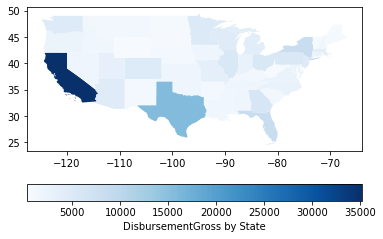

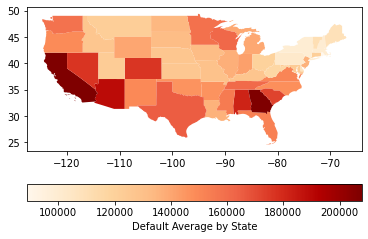

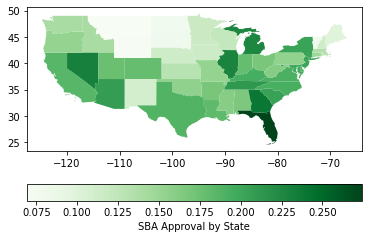

In [45]:
import geopandas as gpd

states = gpd.read_file("cb_2018_us_state_20m.shp")

mapa = data.groupby(["State"]).agg({"DisbursementGross": "sum", "SBA_Appv": "mean", "MIS_Status": "mean"}).reset_index()

mapa["DisbursementGross"] = mapa["DisbursementGross"]/1000000

mapa = mapa[(mapa["State"] != "AK") & (mapa["State"] != "HI")]

map_states = pd.merge(mapa, states, left_on = "State", right_on = "STUSPS")
 
map_states = gpd.GeoDataFrame(map_states, geometry = map_states["geometry"])

### MAPS ###

map_states.plot(column = "DisbursementGross", cmap = "Blues", legend=True, legend_kwds = {"label": "DisbursementGross by State", "orientation" : "horizontal"})

map_states.plot(column = "SBA_Appv", cmap= 'OrRd', legend=True, legend_kwds = {"label": "Default Average by State", "orientation" : "horizontal"})

map_states.plot(column = "MIS_Status", cmap='Greens', legend=True, legend_kwds = {"label": "SBA Approval by State", "orientation" : "horizontal"})


### Distribuiçoes ###

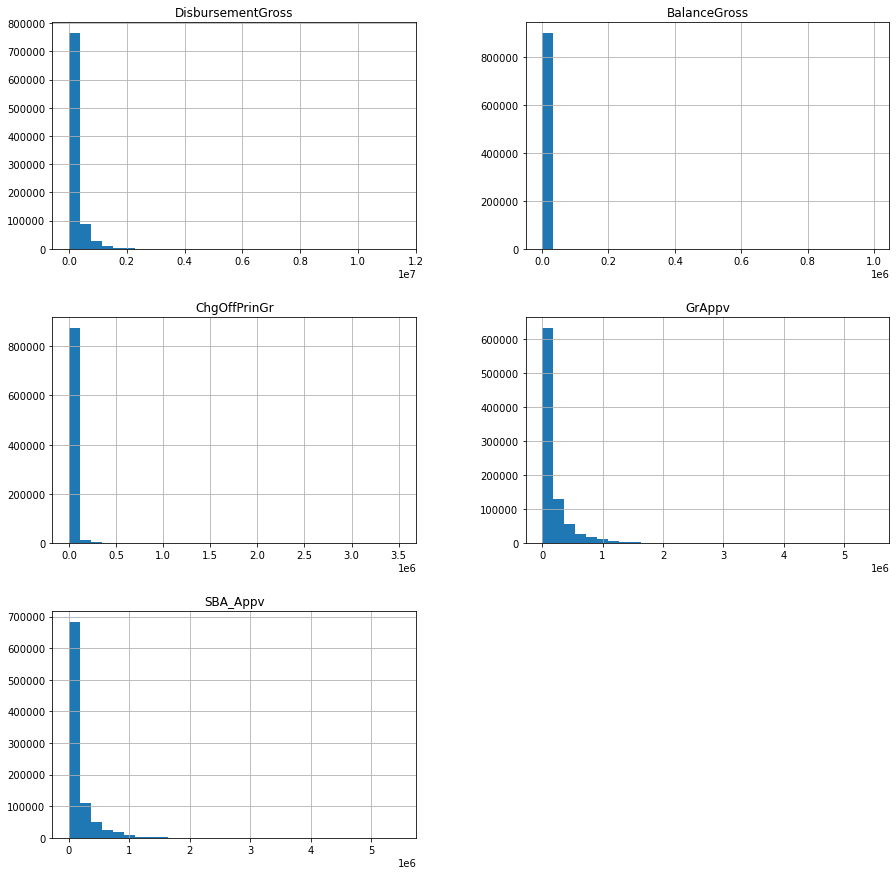

In [46]:
data[num_vars].hist(bins=30, figsize=(15,15))
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

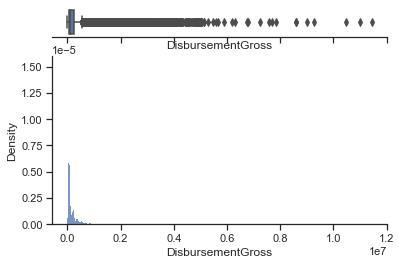

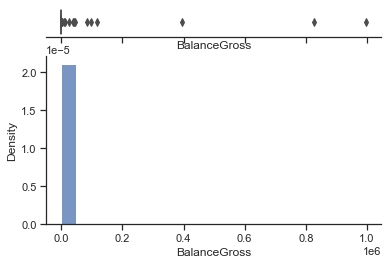

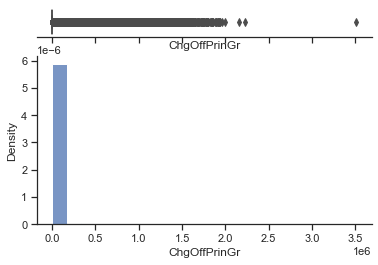

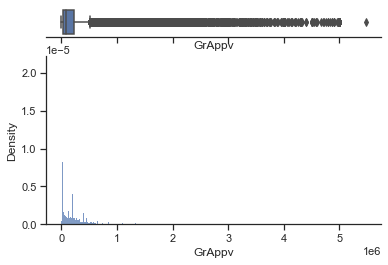

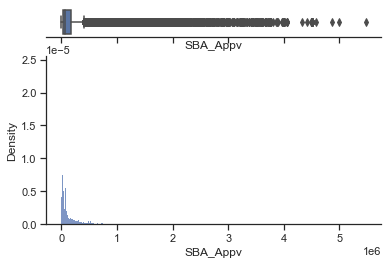

In [47]:
for var in num_vars:
    sns.set(style="ticks")

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data[var], ax=ax_box)
    sns.histplot(data[var], ax=ax_hist, stat = "density")

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

In [48]:
skewed_vars = ["BalanceGross", "ChgOffPrinGr"]

In [49]:
cont_vars = ["DisbursementGross", "GrAppv", "SBA_Appv"]

#### Outliers ####

In [50]:
data[cont_vars].head()

,DisbursementGross,GrAppv,SBA_Appv
0,60000.0,60000.0,48000.0
1,40000.0,40000.0,32000.0
2,287000.0,287000.0,215250.0
3,35000.0,35000.0,28000.0
4,229000.0,229000.0,229000.0


In [51]:
IQR_DG = data["DisbursementGross"].quantile(0.75) - data["DisbursementGross"].quantile(0.25)
IQR_Gr = data["GrAppv"].quantile(0.75) - data["GrAppv"].quantile(0.25)
IQR_SBA = data["SBA_Appv"].quantile(0.75) - data["SBA_Appv"].quantile(0.25)

IQR_DG, IQR_Gr, IQR_SBA

(196000.0, 190000.0, 153750.0)

In [52]:
upper_DG = data["DisbursementGross"].quantile(0.75) + (IQR_DG*3)
upper_Gr = data["GrAppv"].quantile(0.75) + (IQR_Gr*3)
upper_SBA = data["SBA_Appv"].quantile(0.75) + (IQR_SBA*3)

upper_DG, upper_Gr, upper_SBA

(826000.0, 795000.0, 636250.0)

In [53]:
data[cont_vars].describe().round()

,DisbursementGross,GrAppv,SBA_Appv
count,899164.0,899164.0,899164.0
mean,201154.0,192687.0,149489.0
std,287641.0,283263.0,228415.0
min,0.0,200.0,100.0
25%,42000.0,35000.0,21250.0
50%,100000.0,90000.0,61250.0
75%,238000.0,225000.0,175000.0
max,11446325.0,5472000.0,5472000.0


In [54]:
data.loc[data["DisbursementGross"]>= 826000.0, "DisbursementGross"]=826000.0
data.loc[data["GrAppv"]>= 795000.0, "GrAppv"]= 795000.0
data.loc[data["SBA_Appv"]>= 636250.0, "SBA_Appv"]= 636250.0

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


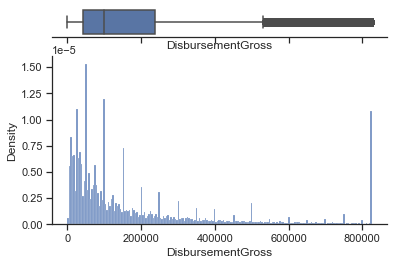

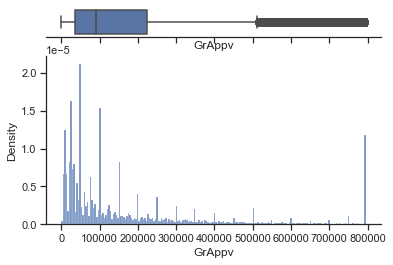

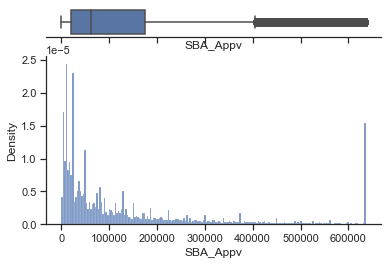

In [55]:
for var in cont_vars:
    sns.set(style="ticks")

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data[var], ax=ax_box)
    sns.histplot(data[var], ax=ax_hist, stat = "density")

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

#### Yeo-Johnson Transformation #####

In [56]:
tmp = data.copy()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


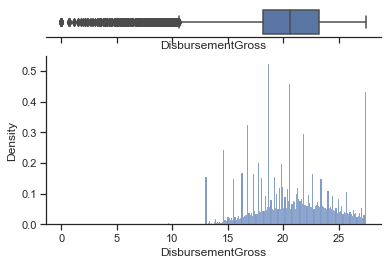

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


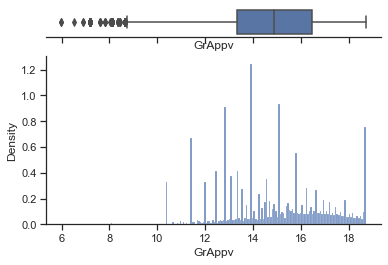

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


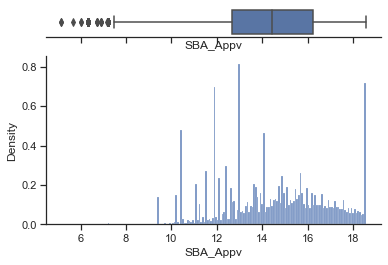

In [57]:
for var in cont_vars:
    tmp[var], param = stats.yeojohnson(data[var])

for var in tmp[cont_vars]:  
    sns.set(style="ticks")

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(tmp[var], ax=ax_box)
    sns.histplot(tmp[var], ax=ax_hist, stat = "density")

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

- As variáveis parecem agora mais próximas da distribuição normal

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


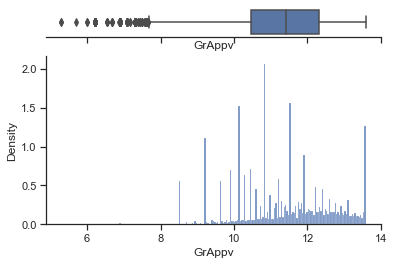

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


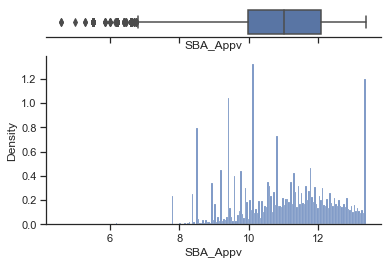

In [58]:
tmp = data.copy()
for var in ["GrAppv", "SBA_Appv"]:
    tmp[var] = np.log(data[var])
    
for var in ["GrAppv", "SBA_Appv"]:  
    sns.set(style="ticks")

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(tmp[var], ax=ax_box)
    sns.histplot(tmp[var], ax=ax_hist, stat = "density")

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

 ## Skewed Variables ##

In [59]:
skewed_vars

['BalanceGross', 'ChgOffPrinGr']

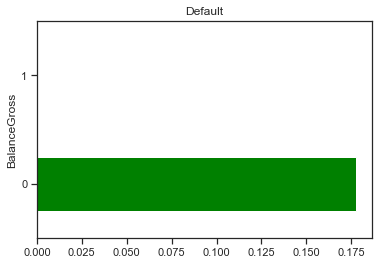

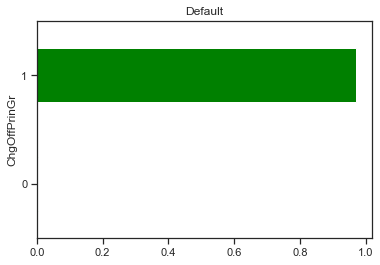

In [60]:
for var in skewed_vars:
    
    tmp = data.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)["MIS_Status"].agg(['mean'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             title="Default", color='green')

    plt.show()

- Variáveis perfeitamente colineares com Default. 
1. BalanceGross - Mutuários com valor bruto pendente ainda não são consideradas inadimplentes, ainda são consideradas "pendentes". Por esse motivo, mutuários com valores lançados como pendente necessariamente não são inadimplentes.
2.  Charged-off Amount - O valor de default é obviamente perfeitamente colinear com Default.

## Descrete Variables ##

In [61]:
disc_vars

['NoEmp', 'CreateJob', 'RetainedJob']

In [62]:
(data[disc_vars].isnull()).mean()

NoEmp          0.0
CreateJob      0.0
RetainedJob    0.0
dtype: float64

In [63]:
for i in disc_vars:
    print(data[i].astype(str).str.isnumeric().value_counts())

True    899164
Name: NoEmp, dtype: int64
True    899164
Name: CreateJob, dtype: int64
True    899164
Name: RetainedJob, dtype: int64


In [64]:
(data[disc_vars] == 0).mean()

NoEmp          0.007375
CreateJob      0.699814
RetainedJob    0.489792
dtype: float64

In [65]:
data[disc_vars].max()

NoEmp          9999
CreateJob      8800
RetainedJob    9500
dtype: int64

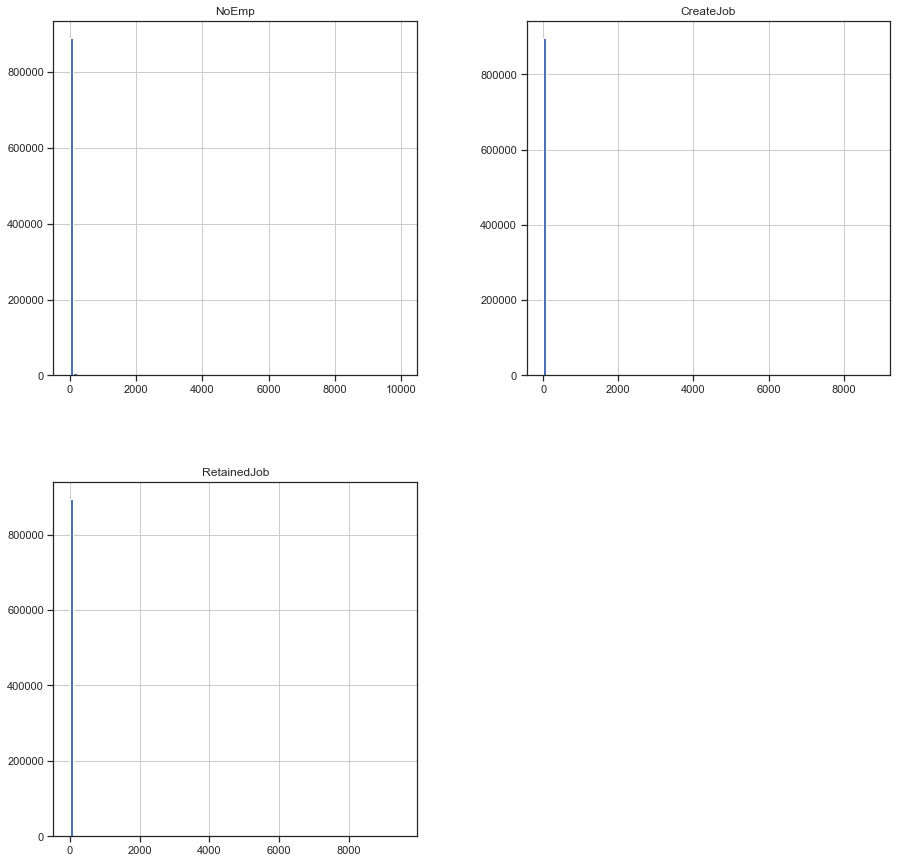

In [66]:
data[disc_vars].hist(bins=100, figsize=(15,15))
plt.show()

### Temporal Variables ###

In [67]:
temp_vars

['ApprovalDate', 'ApprovalFY', 'DisbursementDate', 'ChgOffDate']

In [68]:
data[temp_vars].head()

,ApprovalDate,ApprovalFY,DisbursementDate,ChgOffDate
0,28-Feb-97,1997,28-Feb-99,NaN
1,28-Feb-97,1997,31-May-97,NaN
2,28-Feb-97,1997,31-Dec-97,NaN
3,28-Feb-97,1997,30-Jun-97,NaN
4,28-Feb-97,1997,14-May-97,NaN


In [69]:
(data[temp_vars].isnull()).mean()

ApprovalDate        0.000000
ApprovalFY          0.000000
DisbursementDate    0.002634
ChgOffDate          0.819055
dtype: float64

In [70]:
(data[temp_vars] == 0).mean()

ApprovalDate        0.0
ApprovalFY          0.0
DisbursementDate    0.0
ChgOffDate          0.0
dtype: float64

In [71]:
data["ApprovalFY"].astype(str).str.isnumeric().value_counts()

True     899146
False        18
Name: ApprovalFY, dtype: int64

In [72]:
data["ApprovalFY"].astype(str).str.isnumeric().value_counts()
for i in alpha:
    data["ApprovalFY"] = data["ApprovalFY"].astype(str).str.replace(i, "")

<ipython-input-72-477560782aa9>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["ApprovalFY"] = data["ApprovalFY"].astype(str).str.replace(i, "")


In [73]:
data["ApprovalFY"].astype(str).str.isnumeric().value_counts()

True    899164
Name: ApprovalFY, dtype: int64

<AxesSubplot:xlabel='ApprovalFY'>

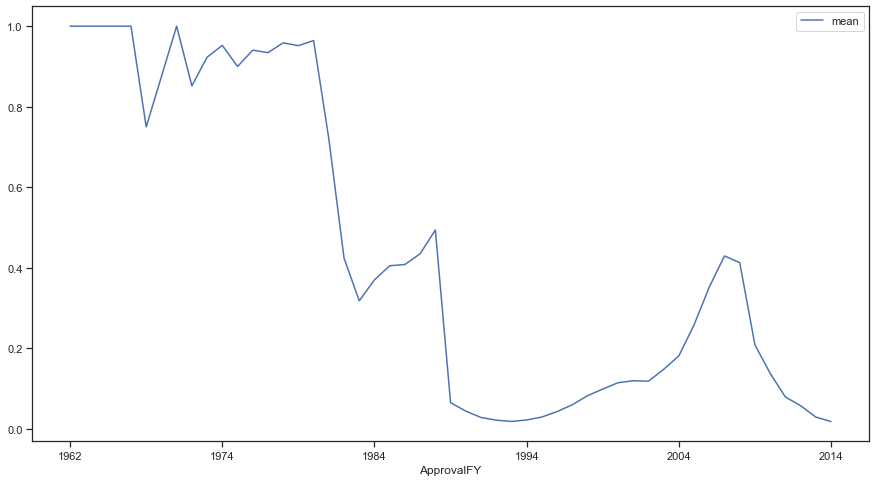

In [74]:
date_default = data.groupby(["ApprovalFY"])["MIS_Status"].agg(["mean"])
date_default.plot(kind= "line", figsize = (15, 8))

<AxesSubplot:xlabel='ApprovalFY'>

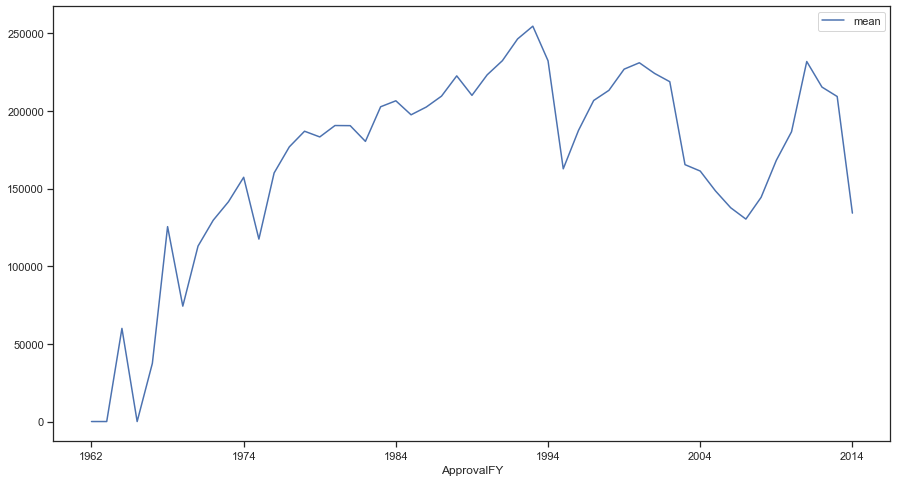

In [75]:
date_dgross = data.groupby(["ApprovalFY"])["DisbursementGross"].agg(["mean"])
date_dgross.plot(kind= "line", figsize = (15, 8))

<AxesSubplot:xlabel='ApprovalFY'>

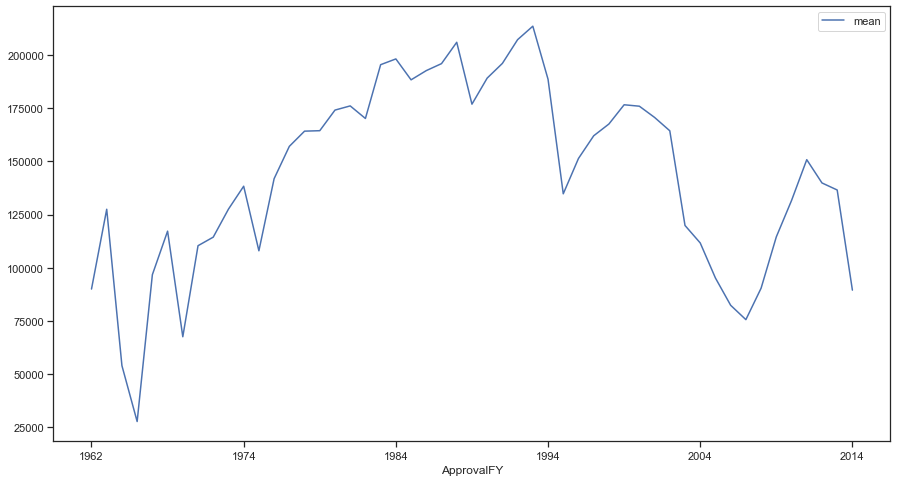

In [76]:
date_sba = data.groupby(["ApprovalFY"])["SBA_Appv"].agg(["mean"])
date_sba.plot(kind= "line", figsize = (15, 8))

<AxesSubplot:xlabel='ApprovalFY'>

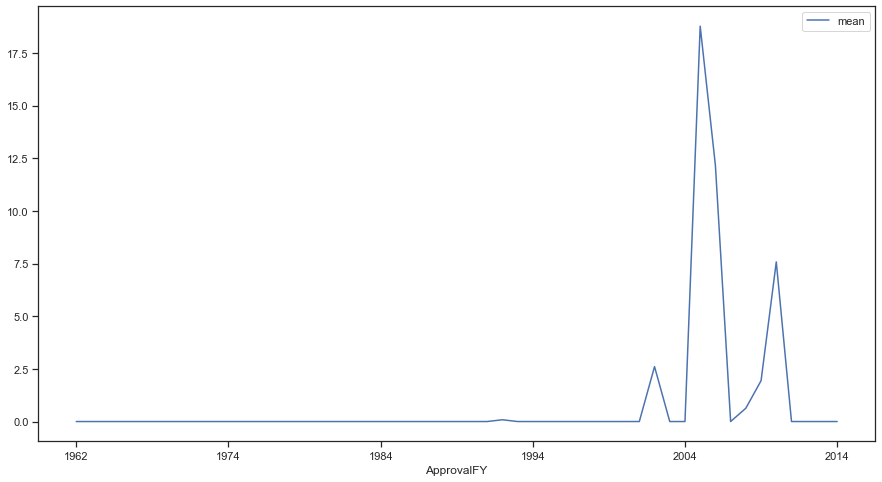

In [77]:
date_bgross = data.groupby(["ApprovalFY"])["BalanceGross"].agg(["mean"])
date_bgross.plot(kind= "line", figsize = (15, 8))

<AxesSubplot:xlabel='ApprovalFY'>

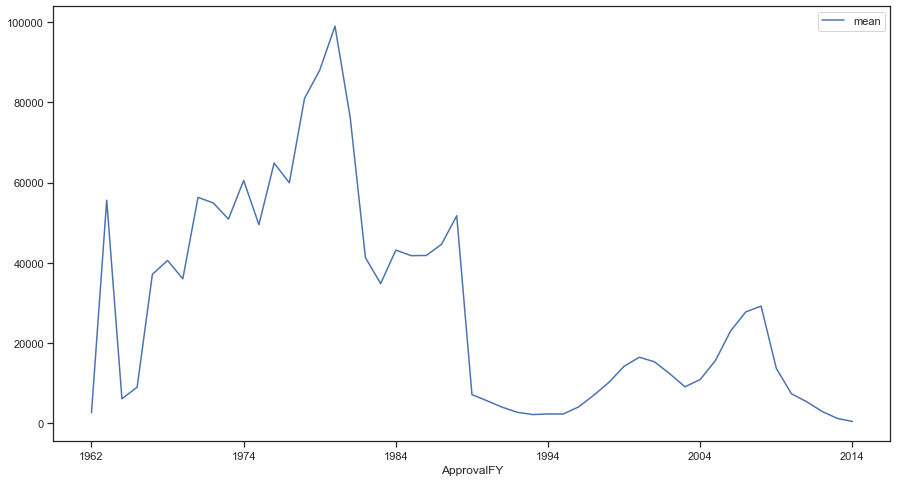

In [78]:
date_coff = data.groupby(["ApprovalFY"])["ChgOffPrinGr"].agg(["mean"])
date_coff.plot(kind= "line", figsize = (15, 8))